# Goals



In [2]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi as un


In [3]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# from scipy.io import readsav
from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnsst_datance
# import use_nessi as un
from importlib import reload
# import matplotlib.animation as animation
# from PIL import Image
# from scipy.interpolate import interp1d
# import datetime as dt
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection


In [4]:
reload(un)
# And now the running commands
openfile='nb_6173_2019-05-06T08_33_15_scans=0-170_stokes_corrected_im.fits'
header= f.getheader(un.get_file_path_fits(openfile))
header = un.add_enters(str(header), length_row=79)
print(header)

with open('headers/header2019Fe6173.txt', 'w') as file:
    file.write(header)

 [astropy.io.fits.verify]


SIMPLE  =                    T / Written by IDL:  Mon Jan 27 12:35:07 2020     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1062 / Number of positions along axis 1              
 NAXIS2  =                 1068 / Number of positions along axis 2              
 NAXIS3  =                   15 / Number of positions along axis 3              
 NAXIS4  =                    4 / Number of positions along axis 4              
 NAXIS5  =                  171 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 TIMESYS = 'UTC     '           /                                               
 DATE    = '2020-01-27T16:47:38' / Creation UTC date of FITS header             
 VAR_KEYS= 'VAR-EXT-DATE-BEG;DATE-BEG,VAR-EXT-DATE-END;DATE-END,VAR-EXT-DATE-AV&
'CONTINUE  'G;DATE-AVG,VAR-EX

In [5]:
wavelengths = solarnet.get_wav('fits/nb_6173_2019-05-06T08_33_15_scans=0-170_stokes_corrected_im.fits')
wavelengths

 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


array([617.2725, 617.2775, 617.2825, 617.286 , 617.2895, 617.293 ,
       617.2965, 617.3   , 617.3035, 617.307 , 617.3105, 617.314 ,
       617.3175, 617.3225, 617.3275], dtype='>f8')

the found wavelengts by solarnet where  [617.2725 617.2775 617.2825 617.286  617.2895 617.293  617.2965 617.3
 617.3035 617.307  617.3105 617.314  617.3175 617.3225 617.3275]


(1068, 1062) (1068, 1062)
Boundary
Blue=Outside, yellow=Inside


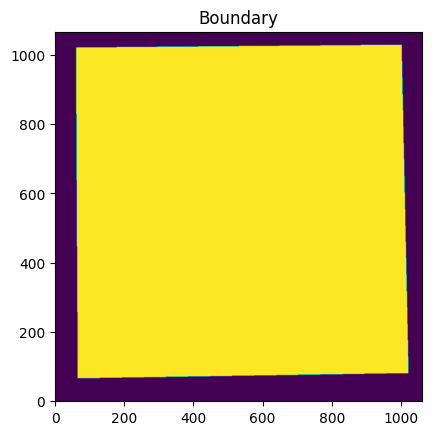

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


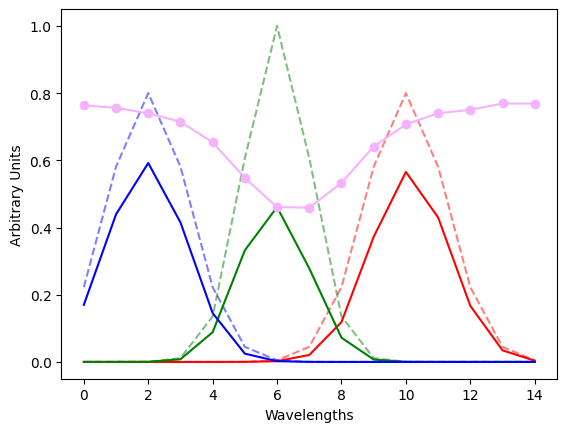

COCOPLOT at  t=08:57:59 UT (frame number 70 )


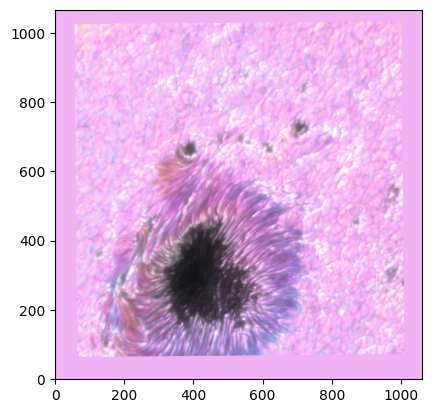

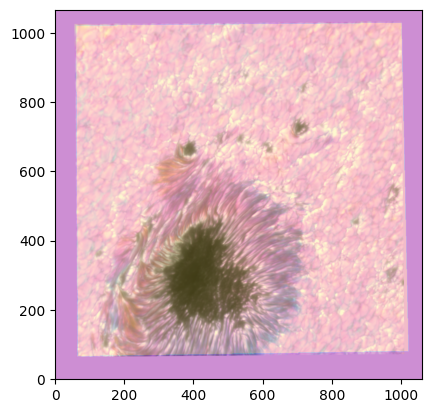

(1068, 1062, 3) (1068, 1062) 
HOW DOES THOSE DO NOT OVERLAP????


In [6]:

vertices = [(1028, 1000),(1020, 60), (65,65), (80,1020)] # boundary of the first frame


reload(un)
%matplotlib inline
# %matplotlib widget
sst_data = un.SST_data('nb_6173_2019-05-06T08_33_15_scans=0-170_stokes_corrected_im.fits',
                   'use_solarnet','use_solarnet', name_of_line='Fe6173_2019', thresh=[1e-15,2e-5],
                   boundary_methode='By_user', boundary_arguments=vertices)

# Here the wavelengths are writen in nm in stead of angstroms
sst_data._wavel =10 * sst_data._wavel

sst_data.update_filters([[10,1.25], [6,1], [2,1.25]])
sst_data.plot_filt(880,900)
sst_data.ccp_frame(70)

sst_data.ccp_frame(70,Show=False)
plt.imshow(sst_data.current_ccp, origin='lower')

plt.imshow(sst_data.boundary, origin='lower', alpha=0.2)
plt.show()
print(np.shape(sst_data.current_ccp),np.shape(sst_data.boundary[::-1,:]), "\nHOW DOES THOSE DO NOT OVERLAP????")

In [7]:
np.average(sst_data.datacube[0,0,0,:,:], weights=sst_data.boundary)
np.shape(sst_data.boundary), np.shape(sst_data.datacube)

((1068, 1062), (171, 4, 15, 1068, 1062))

The peak occurs at frame [144] at time t=['09:23:48 UT.


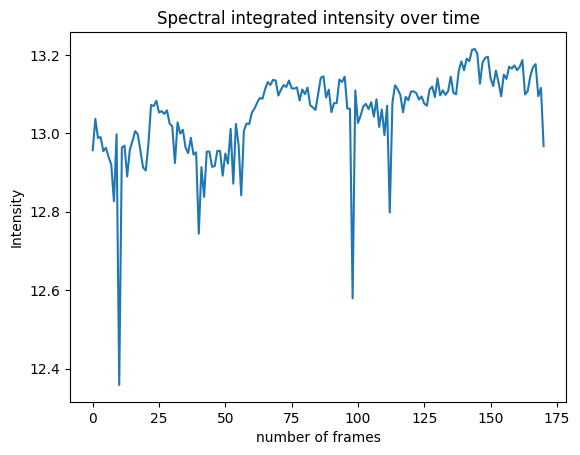

In [8]:
sst_data.calculate__FOV_spect_over_time(show_total_spectrum=True)

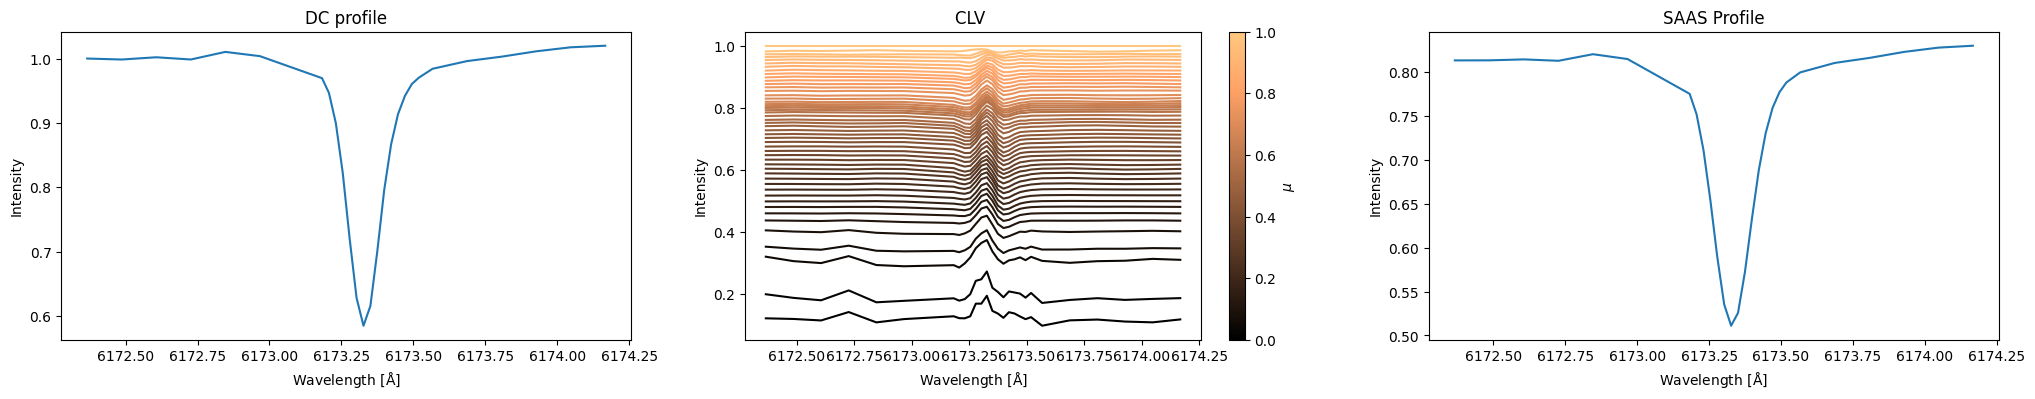

6173.350517499285 6173.313184165952


In [9]:
import use_nessi3 as un3
reload(un3)
theor_line = un3.linestudier('6173_clv.fits', nr=101, neglect_atlas=True)
print(np.median(theor_line.sst_wav), np.mean(theor_line.sst_wav))

# Finding $\mu$

The frame is centered at (-716.9191798496093, 186.15001297509767)
[-748.3247798496094, -685.5135798496093, 154.56681297509766, 217.73321297509767]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.635143044777981 for timeframe 0
succesfully saved.
The frame is centered at (-716.9191798496093, 186.15001297509767)
[-748.3247798496094, -685.5135798496093, 154.56681297509766, 217.73321297509767]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.635143044777981 for timeframe 170
We take average mu to be  0.635143044777981
Mu also set to the theoretic nessi line.
We take average mu to be  0.635143044777981


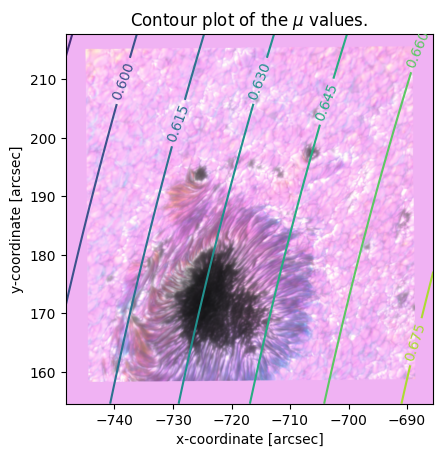

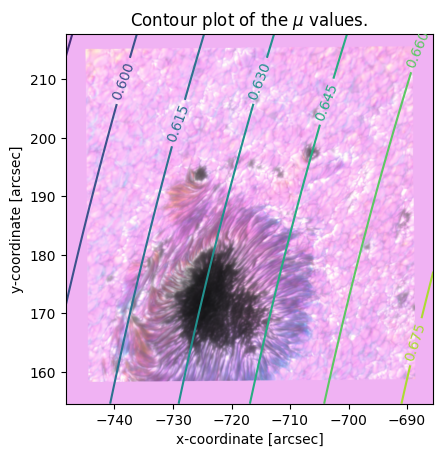

In [10]:
reload(un)
sst_data.set_mu(theor_line=theor_line)
print('We take average mu to be ', sst_data.mu)

(356, 354) (356, 354) (355, 353)


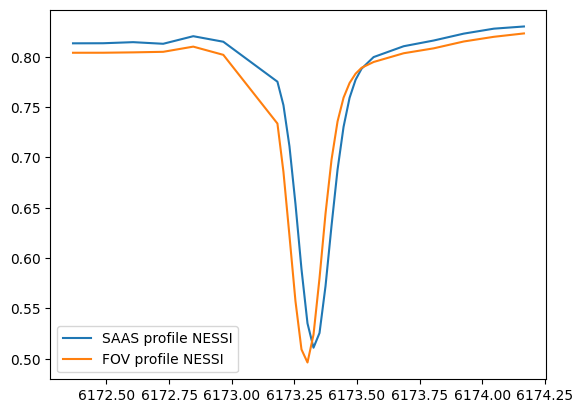

In [11]:
reload(un3)
theor_line.set_fov( sst_data.xx, sst_data.yy, sst_data.boundary, reduction=3)

In [12]:
xy = un.get_coord_creator(sst_data.filename)
print(np.shape(sst_data.datacube))
xy(1038//2, 1079 //2)

(171, 4, 15, 1068, 1062)


[-717.6289109230556, 186.4457358215396]

## Finding a suitable quiet sun patch


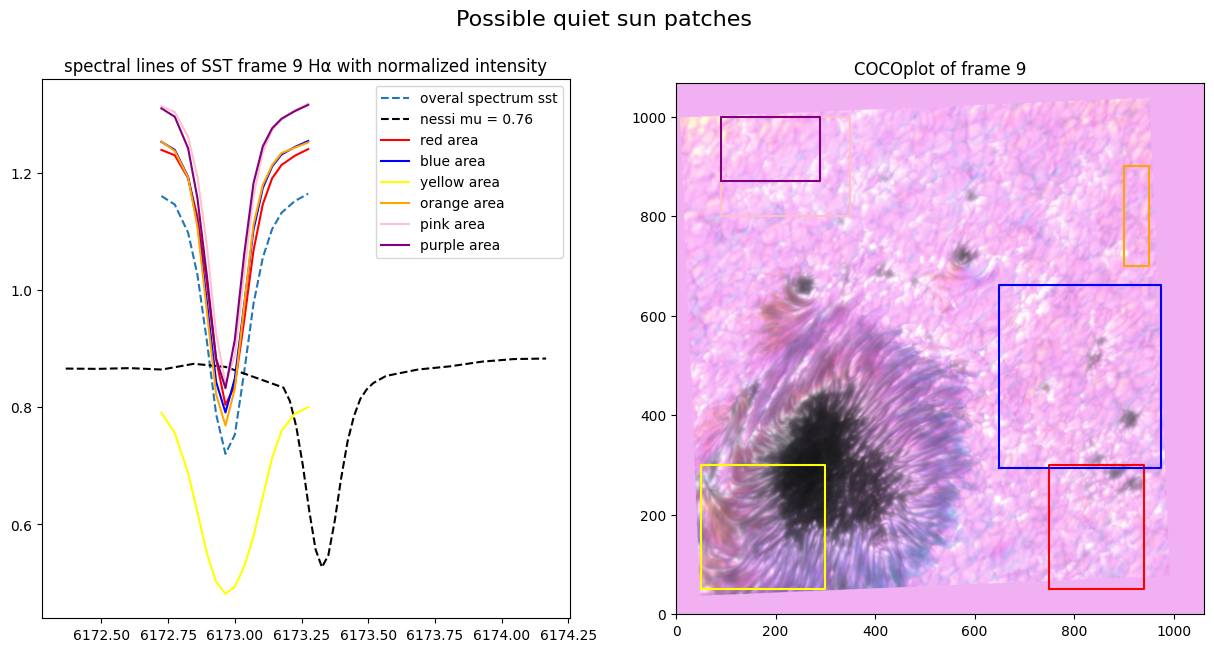

In [13]:
X = [[(750,940), (50,300)], [(650,975), (294,662)],[(50,300), (50,300)], [(900, 950), (700, 900)], [(90,350), (800,1000)] , [(90,290), (870,1000)] ]
frame = 9

sst_data.possible_quiet_sun_patches(frame, theor_line , X=X)


### Which quiet sun?

fill in here which color the wanted quiet sun patch had 

In [14]:
color_wanted_patch = 'orange'

the edges of the patch are denoted by the xlim: (900, 950) and ylim: (700, 900)


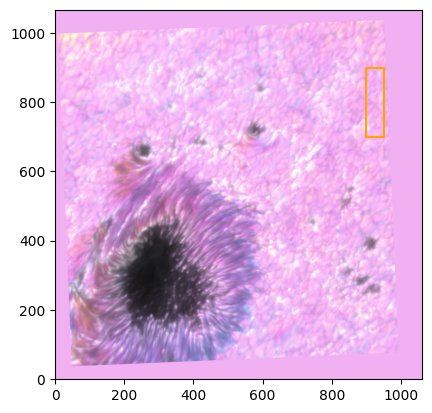

The quiet sun is pick at x (-693.5943798496093, 201.8972129750977) with average              mu 0.6582821303369528


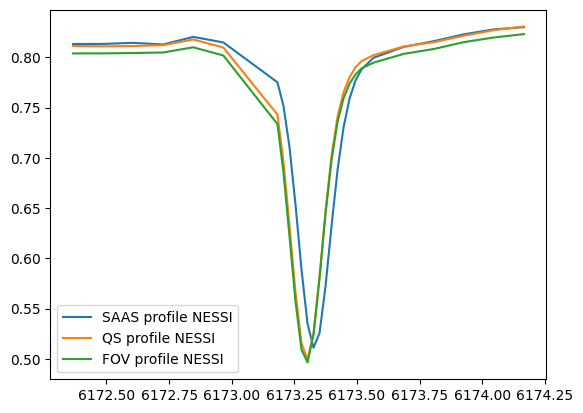

{'frame': 9, 'xlim': (900, 950), 'ylim': (700, 900), 'color': 'orange'}

In [15]:
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']
ind = colors.index(color_wanted_patch)

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

sst_data.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_line.set_quiet_sun(xlim=xlim, ylim=ylim, show=True, reduction=0)
sst_data.quiet_sun

[6172.725 6172.775 6172.825 6172.86  6172.895 6172.93  6172.965 6173.
 6173.035 6173.07  6173.105 6173.14  6173.175 6173.225 6173.275] [1.25350428 1.23715961 1.19202161 1.10782707 0.96521431 0.82209241
 0.76858199 0.83144999 0.97181308 1.11126637 1.1793611  1.21315205
 1.23365664 1.24294603 1.25181711] [0.81217263 0.81449097 0.81687082 0.81699217 0.81464848 0.81230479
 0.8099611  0.79951521 0.7887021  0.77788899 0.76707589 0.75626278
 0.74544967 0.64763432 0.52287155]
[-0.3505175   1.49192549]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 6998327.248097983
        x: [-3.369e-01  1.563e+00]
      nit: 8
      jac: [-1.125e+00  1.250e-01]
 hess_inv: [[ 1.419e-11 -7.604e-12]
            [-7.604e-12  1.298e-10]]
     nfev: 143
     njev: 44


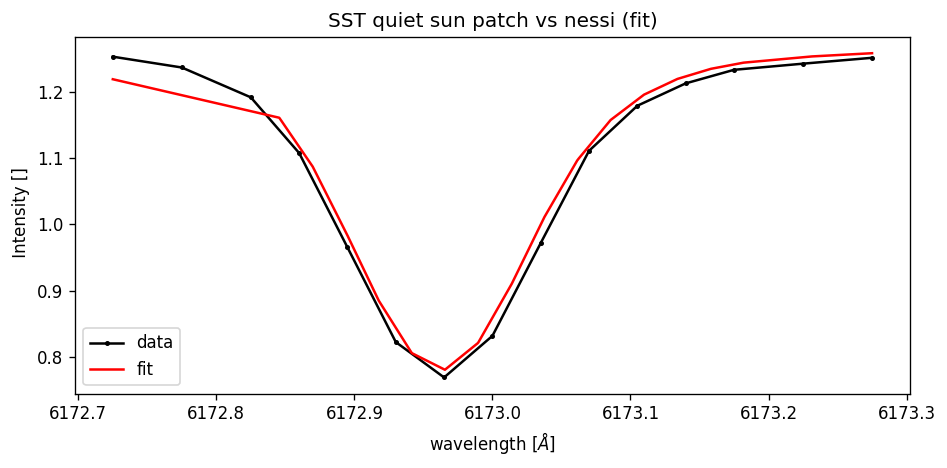

de p-waarde is  0.0 
Chi^2 reduced= 538332.8652383063 
aantal vrijheidgraden= 13 
chi^2= 6998327.248097983
we behouden de fit tot op een betrouwbaarheidsniveau van  0.0 
Oftewel verwerp als p-waarde <lpha-niveau 


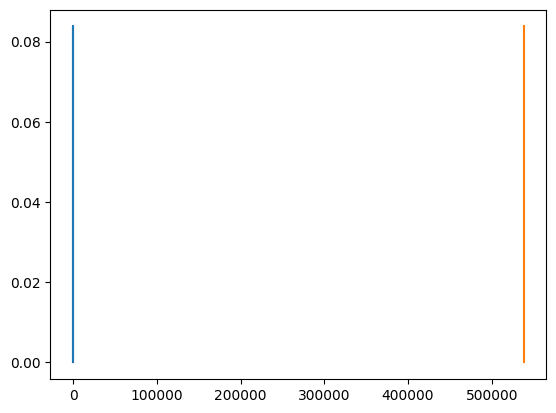

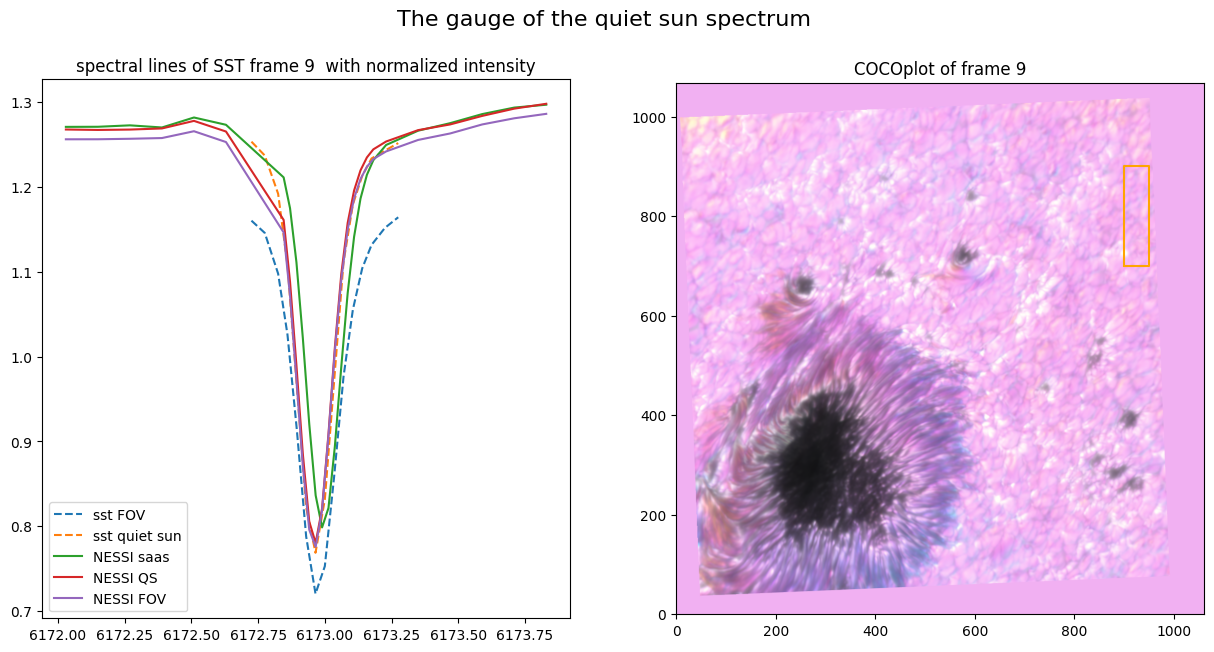

In [16]:
reload(un3)
un3.fit_qs_to_NESSI(theor_line, sst_data)

In [17]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (900, 950), 'ylim': (700, 900), 'color': 'orange'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [144] at time t=['09:23:48 UT.
The areafactor for THIS flare is 0.0010923042986090052 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 87.78%.


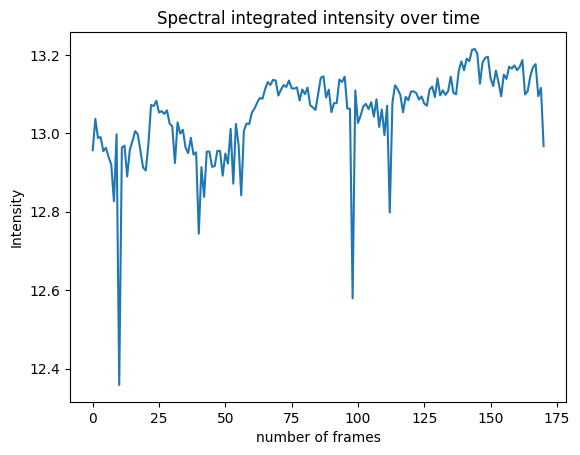

In [18]:
un.save_for_further_analysis(sst_data, theor_line)


# Movie Making

frame: 0, 08:33:33.599610, total number of frames: 171 


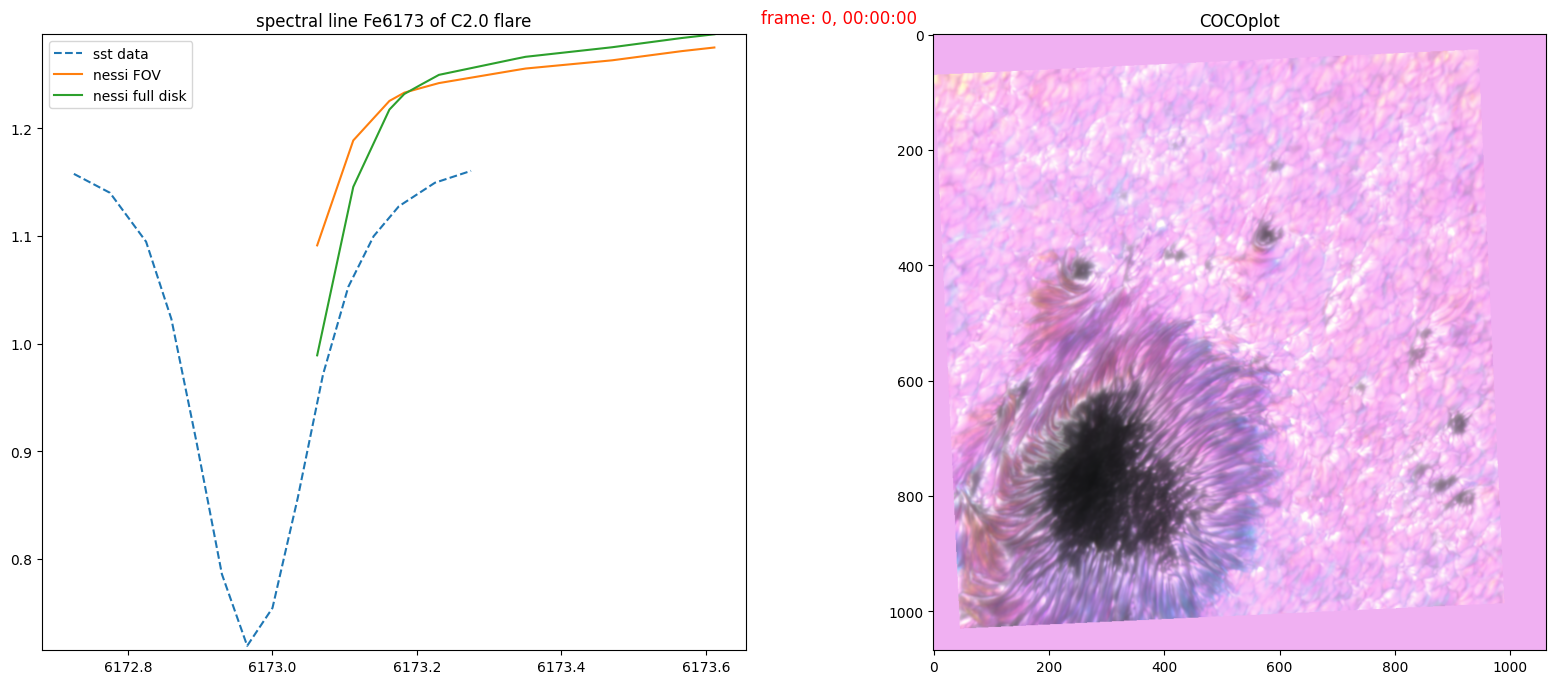

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 We are exiting this kernel


In [19]:
# fill in here all arguments
theor_line = theor_line
sst_data = sst_data
name_of_flare = "C2.0"
name_of_line = "Fe6173"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)

In [20]:
exit()

: 